In [3]:
import plotly.offline as pyo
pyo.init_notebook_mode()

In [4]:
import numpy as np
import pandas as pd 
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud, STOPWORDS

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode()
from plotly.subplots import make_subplots

In [5]:
import glob

a=glob.glob("C:\\Python\\Data analysis\\Squid Game Sentiment Analyssi\\data\\*.csv")
a

['C:\\Python\\Data analysis\\Squid Game Sentiment Analyssi\\data\\tweets_v8.csv']

In [6]:
data = pd.read_csv(a[0])

data.head()

user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277             1341   
4  2018-12-19 20:38:28+00:00             330           152             2278   

   user_verified                       date  \
0          False  2021-10-06 12:05:38+00:00   
1          False  2021-10-06 12:05:22+00:00   
2          False  2021-10-06 12:05:22+00:00   
3          False  2021-10-06 12:05:04+00:00   
4          False  2021-10-06 12:05:00+00:00   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1  That marble episode of #SquidGame  ruined me. 😭😭😭  Twitter for Android   
2                                    #Squidgame time      Twitter Web App   
3  //Blood on 1st slide\nI'm joining the squidgam...      Twitter Web App   
4  The two first games, players were killed by th...      Twitter Web App   

   is_retweet  
0       False  
1       False  
2       False  
3       False  
4       False

## Quick data lookup

In [8]:
print("There are {} columns and {} rows in this dataset.".format(len(data.columns), len(data.index)))

data.info()

There are 12 columns and 80019 rows in this dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_location     56149 non-null  object
 2   user_description  74808 non-null  object
 3   user_created      80019 non-null  object
 4   user_followers    80019 non-null  int64 
 5   user_friends      80019 non-null  int64 
 6   user_favourites   80019 non-null  int64 
 7   user_verified     80019 non-null  bool  
 8   date              80019 non-null  object
 9   text              80019 non-null  object
 10  source            80019 non-null  object
 11  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 6.3+ MB


In [10]:
data.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

## Data preprocessing for sentiment analysis

In [15]:
def extract_hashtags(text):
    hashtags_list=[]
    for word in text.split():
        if word[0] == "#":
            hashtags_list.append(word[1:])
    

    return hashtags_list

data["hashtags"] = data["text"].apply(lambda x: extract_hashtags(x.lower()))

data.head()


user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277             1341   
4  2018-12-19 20:38:28+00:00             330           152             2278   

   user_verified                       date  \
0          False  2021-10-06 12:05:38+00:00   
1          False  2021-10-06 12:05:22+00:00   
2          False  2021-10-06 12:05:22+00:00   
3          False  2021-10-06 12:05:04+00:00   
4          False  2021-10-06 12:05:00+00:00   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1  That marble episode of #SquidGame  ruined me. 😭😭😭  Twitter for Android   
2                                    #Squidgame time      Twitter Web App   
3  //Blood on 1st slide\nI'm joining the squidgam...      Twitter Web App   
4  The two first games, players were killed by th...      Twitter Web App   

   is_retweet              hashtags  
0       False  [squidgame, netflix]  
1       False           [squidgame]  
2       False           [squidgame]  
3       False          [squidgame…]  
4       False                    []

In [16]:
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    return text

data["text"]=data["text"].apply(lambda x: clean(x))

data.head()

user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277             1341   
4  2018-12-19 20:38:28+00:00             330           152             2278   

   user_verified                       date  \
0          False  2021-10-06 12:05:38+00:00   
1          False  2021-10-06 12:05:22+00:00   
2          False  2021-10-06 12:05:22+00:00   
3          False  2021-10-06 12:05:04+00:00   
4          False  2021-10-06 12:05:00+00:00   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1   That marble episode of #SquidGame ruined me. 😭😭😭  Twitter for Android   
2                                    #Squidgame time      Twitter Web App   
3  //Blood on  slide I'm joining the squidgame th...      Twitter Web App   
4  The two first games, players were killed by th...      Twitter Web App   

   is_retweet              hashtags  
0       False  [squidgame, netflix]  
1       False           [squidgame]  
2       False           [squidgame]  
3       False          [squidgame…]  
4       False                    []

In [17]:
analyzer=SIA()

scores=[]
for i in range(len(data["text"])):
    score = analyzer.polarity_scores(data["text"][i])
    score= score["compound"]
    scores.append(score)
sentiment=[]
for i in scores:
    if i <= -0.05:
        sentiment.append("Negative")
    if i >= 0.05:
        sentiment.append("Positive")
    else:
        sentiment.append("Neutral")

data["sentiment"] = pd.Series(np.array(sentiment))

In [18]:
data.head()

user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277             1341   
4  2018-12-19 20:38:28+00:00             330           152             2278   

   user_verified                       date  \
0          False  2021-10-06 12:05:38+00:00   
1          False  2021-10-06 12:05:22+00:00   
2          False  2021-10-06 12:05:22+00:00   
3          False  2021-10-06 12:05:04+00:00   
4          False  2021-10-06 12:05:00+00:00   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1   That marble episode of #SquidGame ruined me. 😭😭😭  Twitter for Android   
2                                    #Squidgame time      Twitter Web App   
3  //Blood on  slide I'm joining the squidgame th...      Twitter Web App   
4  The two first games, players were killed by th...      Twitter Web App   

   is_retweet              hashtags sentiment  
0       False  [squidgame, netflix]  Negative  
1       False           [squidgame]   Neutral  
2       False           [squidgame]  Negative  
3       False          [squidgame…]   Neutral  
4       False                    []   Neutral

### WORDCLOUD ANALYSIS OF TWEET TEXT

(-0.5, 399.5, 199.5, -0.5)

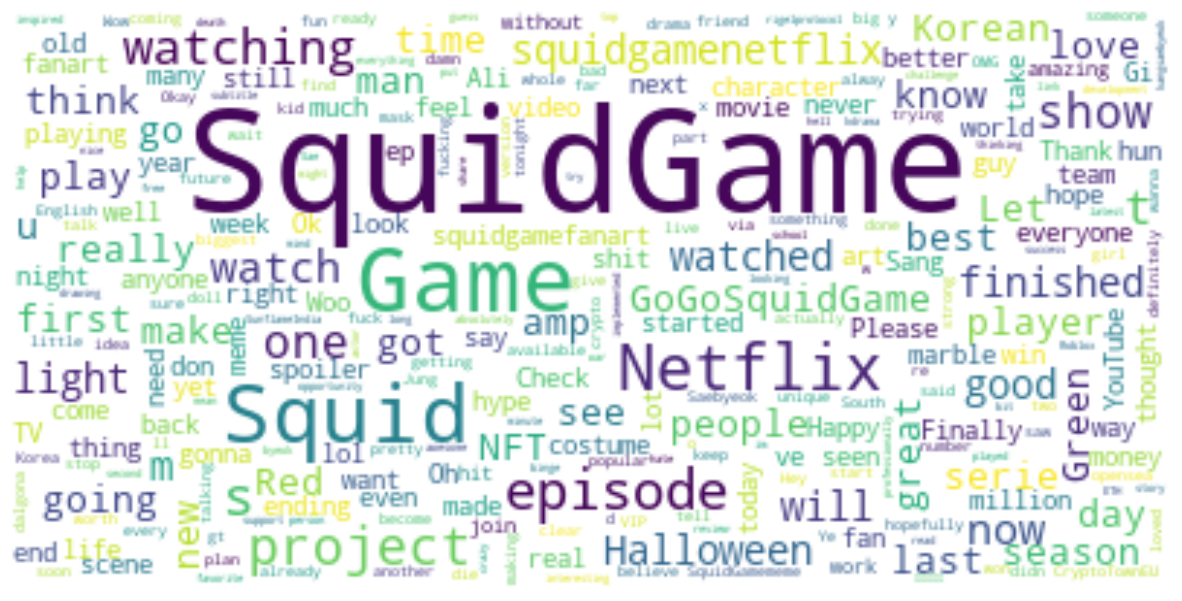

In [19]:
tweet_all = " ".join(word for word in data.text)

wordcl = WordCloud(background_color='white', max_font_size = 50, max_words = 5000, collocations = False).generate(tweet_all)
plt.figure(figsize=(15, 15))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')

### REMOVING PUNCTUATIONS AND MAKING TEXT LOWERCASE

In [20]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text

data["text"] = data["text"].apply(lambda x: clean_text(x))

In [21]:
data["text"]

0        when life hits and the same time poverty strik...
1           that marble episode of squidgame ruined me 😭😭😭
2                                           squidgame time
3        blood on  slide im joining the squidgame thing...
4        the two first games players were killed by the...
                               ...                        
80014    yes yes yes arianagrande squidgame outerwear p...
80015    squid game was reviewed on revaaa squidgame re...
80016    back amp forth between ‘squid game’ creator am...
80017    so what sort of games do you think theyll play...
80018    venanciotaylor tracklist cala a boca swifter g...
Name: text, Length: 80019, dtype: object

### LEMMATIZATION

In [25]:
import spacy

nlp=spacy.load("en_core_web_sm")

df=pd.DataFrame()

df["text"] = data["text"]

def tokenize(text):
    text=re.split("\W+", text)
    return text

df["tokenized"] = df["text"].apply(lambda x: tokenize(x))

stopwords = nlp.Defaults.stop_words

def remove_syopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

df["No_stopwords"] = df["tokenized"].apply(lambda x: remove_syopwords(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [26]:
df.head()

text  \
0  when life hits and the same time poverty strik...   
1     that marble episode of squidgame ruined me 😭😭😭   
2                                     squidgame time   
3  blood on  slide im joining the squidgame thing...   
4  the two first games players were killed by the...   

                                           tokenized  \
0  [when, life, hits, and, the, same, time, pover...   
1  [that, marble, episode, of, squidgame, ruined,...   
2                                  [squidgame, time]   
3  [blood, on, slide, im, joining, the, squidgame...   
4  [the, two, first, games, players, were, killed...   

                                        No_stopwords  \
0  [life, hits, time, poverty, strikes, gong, yoo...   
1             [marble, episode, squidgame, ruined, ]   
2                                  [squidgame, time]   
3  [blood, slide, im, joining, squidgame, thing, ...   
4  [games, players, killed, mask, guys, bloody, n...   

                                          lemmatized  
0  [life, hit, time, poverty, strike, gong, yoo, ...  
1             [marble, episode, squidgame, ruined, ]  
2                                  [squidgame, time]  
3  [blood, slide, im, joining, squidgame, thing, ...  
4  [game, player, killed, mask, guy, bloody, nigh...

In [27]:
data["text"] = df["lemmatized"]

data.head()

user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277             1341   
4  2018-12-19 20:38:28+00:00             330           152             2278   

   user_verified                       date  \
0          False  2021-10-06 12:05:38+00:00   
1          False  2021-10-06 12:05:22+00:00   
2          False  2021-10-06 12:05:22+00:00   
3          False  2021-10-06 12:05:04+00:00   
4          False  2021-10-06 12:05:00+00:00   

                                                text               source  \
0  [life, hit, time, poverty, strike, gong, yoo, ...  Twitter for Android   
1             [marble, episode, squidgame, ruined, ]  Twitter for Android   
2                                  [squidgame, time]      Twitter Web App   
3  [blood, slide, im, joining, squidgame, thing, ...      Twitter Web App   
4  [game, player, killed, mask, guy, bloody, nigh...      Twitter Web App   

   is_retweet              hashtags sentiment  
0       False  [squidgame, netflix]  Negative  
1       False           [squidgame]   Neutral  
2       False           [squidgame]  Negative  
3       False          [squidgame…]   Neutral  
4       False                    []   Neutral

### SENTIMENT COUNTS

In [29]:
temp = data.groupby("sentiment").count().reset_index().sort_values(by="text", ascending=False)

temp

sentiment  user_name  user_location  user_description  user_created  \
1   Neutral      39766          28002             37181         39769   
2  Positive      26582          18503             24835         26583   
0  Negative      13667           9644             12792         13667   

   user_followers  user_friends  user_favourites  user_verified   date   text  \
1           39769         39769            39769          39769  39769  39769   
2           26583         26583            26583          26583  26583  26583   
0           13667         13667            13667          13667  13667  13667   

   source  is_retweet  hashtags  
1   39769       39769     39769  
2   26583       26583     26583  
0   13667       13667     13667

In [30]:
fig = go.Figure(go.Funnelarea(text=temp.sentiment, values=temp.text, title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}))

fig.show()

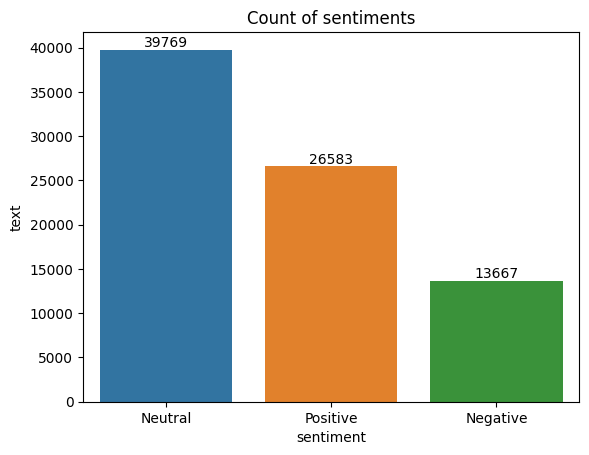

In [38]:
plt.style.use('default')
a1 = sns.barplot(x="sentiment", y="text", data = temp)
a1.bar_label(a1.containers[0], )

plt.title("Count of sentiments")
plt.show()

### ACCOUNT:VERIFIED/NON-VERIFIED

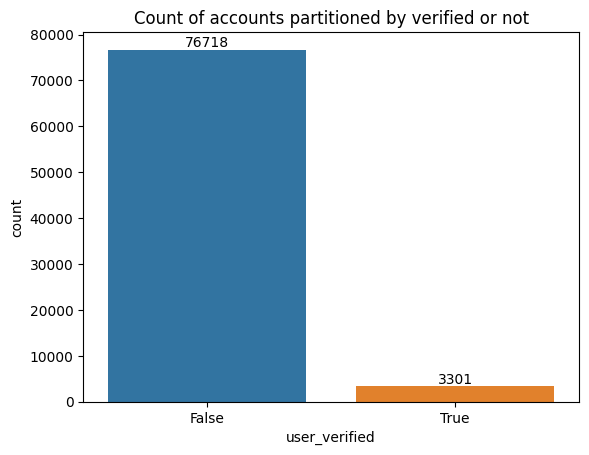

In [43]:
plt.style.use("default")
a2 = sns.countplot(x="user_verified", data= data)
for container in a2.containers:
    a2.bar_label(container)

plt.title("Count of accounts partitioned by verified or not")
plt.show()

### Distribution of favorite received based on the tweet sentiment and verified or not. 

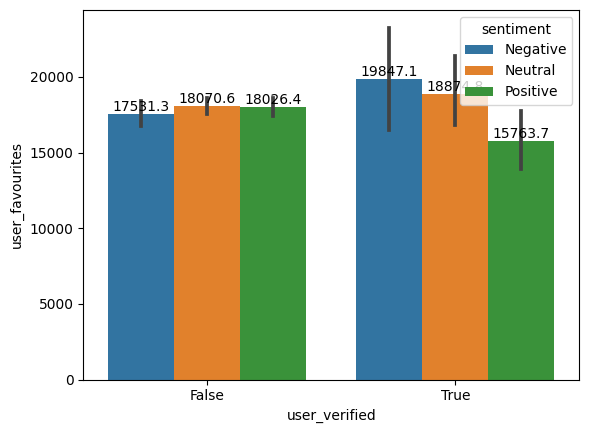

In [44]:
a3 = sns.barplot(x="user_verified", y="user_favourites", data= data, hue="sentiment")
for container in a3.containers:
    a3.bar_label(container)
plt.show()

### Distribution of retweet or not partitioned by sentiment

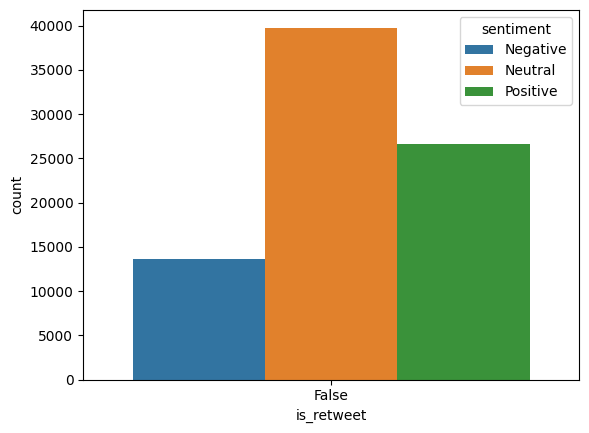

In [46]:
a4 = sns.countplot(x="is_retweet", data=data, hue="sentiment")

plt.show()

No one retweet. 

### THE TOP 30 MOST FREQUENTLY OCCURING WORDS IN THE TWEET TEXT DATA

In [52]:
all_words=[]

for i in range(len(data["text"])):
    a = data["text"][i]
    for l in a:
        all_words.append(l)

all_words = pd.Series(np.array(all_words))

common_words = all_words.value_counts().sort_values(ascending=False)[1:31].rename_axis("Common Words").reset_index(name="count")

a5 = px.treemap(common_words, path=["Common Words"], values="count", title='30 Most Common Words In Tweets', width=1200, height=800)

a5.show()

#### What about the hashtags?

In [55]:
all_hashtags = []

for i in range(len(data["hashtags"])):
    a = data["hashtags"][i]
    for l in a:
        all_hashtags.append(l)

all_hashtags=pd.Series(np.array(all_hashtags))
common_hashtags = all_hashtags.value_counts().sort_values(ascending = False)[:30].rename_axis("Common Hashtags").reset_index(name="count" )

a6 = px.treemap(common_hashtags, path={"Common Hashtags"}, values="count", width=1200, height=800, title="30 Most Common Hashtags In Tweets")

a6.show()

#### Now let's analyze what are the most common words and hashtags in tweets with each sentiment.

In [56]:
Positive_tweet = data[data["sentiment"] == "Positive"].reset_index()
Negative_tweet = data[data['sentiment']=='Negative'].reset_index()
Neutral_tweet = data[data['sentiment']=='Neutral'].reset_index()

### Positive tweets

In [64]:
all_positive_words = []
all_positive_hashtags = []

for i in range(len(Positive_tweet["text"])):
    a = Positive_tweet["text"][i]
    b = Positive_tweet["hashtags"][i]
    for l in a:
        all_positive_words.append(l)
    for l in b:
        all_positive_hashtags.append(l)
all_positive_words = pd.Series(np.array(all_positive_words))
all_positive_hashtags = pd.Series(np.array(all_positive_hashtags))

common_positive_words = all_positive_words.value_counts().sort_values(ascending=False).drop(labels="")[:50].rename_axis('Common Positive Words').reset_index(name="count")

common_positive_hashtags = all_positive_hashtags.value_counts().sort_values(ascending=False)[:50].rename_axis('Common Positive Hashtags').reset_index(name="count")

a7 = px.treemap(common_positive_words, path=['Common Positive Words'], values='count',title='50 Most Common Words In Positive Tweets', width=1200, height=800)
a7.show()

a8 = px.treemap(common_positive_hashtags, path=['Common Positive Hashtags'], values='count',title='50 Most Common Hashtags In Positive Tweets', width=1200, height=800)
a8.show()

### Neutral tweets

In [65]:
all_neutral_words = []
all_neutral_hashtags = []

for i in range(len(Neutral_tweet["text"])):
    a = Neutral_tweet["text"][i]
    b = Neutral_tweet["hashtags"][i]
    for l in a:
        all_neutral_words.append(l)
    for l in b:
        all_neutral_hashtags.append(l)
all_neutral_words = pd.Series(np.array(all_neutral_words))
all_neutral_hashtags = pd.Series(np.array(all_neutral_hashtags))

common_neutral_words = all_neutral_words.value_counts().sort_values(ascending=False).drop(labels="")[:50].rename_axis('Common Neutral Words').reset_index(name="count")

common_neutral_hashtags = all_neutral_hashtags.value_counts().sort_values(ascending=False)[:50].rename_axis('Common Neutral Hashtags').reset_index(name="count")

a9 = px.treemap(common_neutral_words, path=['Common Neutral Words'], values='count',title='50 Most Common Words In Neutral Tweets', width=1200, height=800)
a9.show()

a10 = px.treemap(common_neutral_hashtags, path=['Common Neutral Hashtags'], values='count',title='50 Most Common Hashtags In Neutral Tweets', width=1200, height=800)
a10.show()

### Negative tweets

In [67]:
all_negative_words = []
all_negative_hashtags = []

for i in range(len(Negative_tweet["text"])):
    a = Negative_tweet["text"][i]
    b = Negative_tweet["hashtags"][i]
    for l in a:
        all_negative_words.append(l)
    for l in b:
        all_negative_hashtags.append(l)
all_negative_words = pd.Series(np.array(all_negative_words))
all_negative_hashtags = pd.Series(np.array(all_negative_hashtags))

common_negative_words = all_negative_words.value_counts().sort_values(ascending=False).drop(labels="")[:50].rename_axis('Common Negative Words').reset_index(name="count")

common_negative_hashtags = all_negative_hashtags.value_counts().sort_values(ascending=False)[:50].rename_axis('Common Negative Hashtags').reset_index(name="count")

a11 = px.treemap(common_negative_words, path=['Common Negative Words'], values='count',title='50 Most Common Words In Negative Tweets', width=1200, height=800)
a11.show()

a12 = px.treemap(common_negative_hashtags, path=['Common Negative Hashtags'], values='count',title='50 Most Common Hashtags In Negative Tweets', width=1200, height=800)
a12.show()

### SOURCE DISTRIBUTION OF TWEETS

In [71]:
data_1 = data["source"].value_counts().sort_values(ascending=False).reset_index()

top25source = []

for i in range(len(data_1["source"])):
    a=data_1["index"][i]
    top25source.append(a)

top25source = top25source[:25]
top25source

['Twitter for iPhone',
 'Twitter for Android',
 'Twitter Web App',
 'Twitter for iPad',
 'TweetDeck',
 'Instagram',
 'Hootsuite Inc.',
 'SocialRabbit Plugin',
 'Buffer',
 'Sprout Social',
 'dlvr.it',
 'Revive Social App',
 'IFTTT',
 'LaterMedia',
 'SocialFlow',
 'Twitter Media Studio',
 'WordPress.com',
 'Tweetbot for iΟS',
 'Zoho Social',
 "lucy's microwave",
 'Agorapulse app',
 'Nintendo Switch Share',
 'Echobox',
 'Twitter for Mac',
 'HubSpot']

In [74]:
trace1 = go.Bar(x=top25source, y=data_1["source"], marker = dict(color = 'rgb(250,13,92)', line=dict(color='rgb(0,0,0)',width=1.5)), text=data_1['source'], textposition='outside')

layout = go.Layout(template= "plotly_dark",title = 'TOP 25 SOURCES OF TWEETS' , xaxis = dict(title = 'SOURCE'), yaxis = dict(title = 'Count'), height=700)
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### Check the source distribution of the verified accounts and unverified accounts respectively.

In [82]:
data_verified = data[data["user_verified"]==True].reset_index()
data_not_verified = data[data["user_verified"]==False].reset_index()

### Verified Accounts Part

In [83]:
data_2 = data_verified["source"].value_counts().sort_values(ascending=False).reset_index()

top25source = []

for i in range(len(data_2["source"])):
    a=data_2["index"][i]
    top25source.append(a)

top25source = top25source[:25]

trace2 = go.Bar(x=top25source, y=data_2["source"], marker = dict(color = 'rgb(250,13,92)', line=dict(color='rgb(0,0,0)',width=1.5)), text=data_2['source'], textposition='outside')

layout = go.Layout(template= "plotly_dark",title = 'TOP 25 SOURCES OF TWEETS FROM VERIFIED ACCOUNTS' , xaxis = dict(title = 'SOURCE'), yaxis = dict(title = 'Count'), height=700)
fig = go.Figure(data = [trace2], layout = layout)
fig.show()

### Unverified Accounts Part

In [84]:
data_3 = data_not_verified["source"].value_counts().sort_values(ascending=False).reset_index()

top25source = []

for i in range(len(data_3["source"])):
    a=data_3["index"][i]
    top25source.append(a)

top25source = top25source[:25]

trace2 = go.Bar(x=top25source, y=data_3["source"], marker = dict(color = 'rgb(250,13,92)', line=dict(color='rgb(0,0,0)',width=1.5)), text=data_3['source'], textposition='outside')

layout = go.Layout(template= "plotly_dark",title = 'TOP 25 SOURCES OF TWEETS FROM UNVERIFIED ACCOUNTS' , xaxis = dict(title = 'SOURCE'), yaxis = dict(title = 'Count'), height=700)
fig = go.Figure(data = [trace2], layout = layout)
fig.show()

### HASHTAGS

In [89]:
all_hashtags = []

for i in range(len(data_verified["hashtags"])):
    a = data_verified["hashtags"][i]
    for l in a:
        all_hashtags.append(l)

all_hashtags = pd.Series(np.array(all_hashtags))

common_hashtags = all_hashtags.value_counts().sort_values(ascending=False)[:30].rename_axis("Common Hashtags").reset_index(name="count")

a13 = px.treemap(common_hashtags, path=["Common Hashtags"], values="count", width=1200, height=800, title="30 Most Common Hashtags by VERIFIED ACCOUNTS")

a13.show()

In [90]:
all_hashtags1 = []

for i in range(len(data_not_verified["hashtags"])):
    a = data_not_verified["hashtags"][i]
    for l in a:
        all_hashtags1.append(l)

all_hashtags1 = pd.Series(np.array(all_hashtags1))

common_hashtags1 = all_hashtags1.value_counts().sort_values(ascending=False)[:30].rename_axis("Common Hashtags").reset_index(name="count")

a14 = px.treemap(common_hashtags1, path=["Common Hashtags"], values="count", width=1200, height=800, title="30 Most Common Hashtags by UNVERIFIED ACCOUNTS")

a14.show()

### SENTIMENT WISE WORD FREQUENCY

In [92]:
Positive_tweet = data_verified[data_verified["sentiment"]=="Positive"].reset_index()
Neutral_tweet = data_verified[data_verified["sentiment"]=="Neutral"].reset_index()
Negative_tweet = data_verified[data_verified["sentiment"]=="Negative"].reset_index()

all_positive_words=[]

for i in range(len(Positive_tweet['text'])):
    a=Positive_tweet['text'][i]
    
    for i in a:
        all_positive_words.append(i)
    
all_positive_words=pd.Series(np.array(all_positive_words))
all_neutral_words=[]

for i in range(len(Neutral_tweet['text'])):
    a=Neutral_tweet['text'][i]
    
    for i in a:
        all_neutral_words.append(i)
    
all_neutral_words=pd.Series(np.array(all_neutral_words))
all_negative_words=[]

for i in range(len(Negative_tweet['text'])):
    a=Negative_tweet['text'][i]
   
    for i in a:
        all_negative_words.append(i)
    
all_negative_words=pd.Series(np.array(all_negative_words))
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

common_words=all_negative_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Negative Words').reset_index(name='count')
a15 = px.treemap(common_words, path=['Common Negative Words'], values='count',title='30 Most Common Unique Negative Words by VERIFIED ACCOUNTS', width=1200, height=800)
a15.show()
common_words=all_positive_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Positive Words').reset_index(name='count')
a16 = px.treemap(common_words, path=['Common Positive Words'], values='count',title='30 Most Common Unique Positive Words by VERIFIED ACCOUNTS', width=1200, height=800)
a16.show()
common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Neutral Words').reset_index(name='count')
a17 = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='30 Most Common Unique Neutral Words by VERIFIED ACCOUNTS', width=1200, height=800)
a17.show()

### TWEET SENTIMENT BASED ANALYSIS OF LOCATION

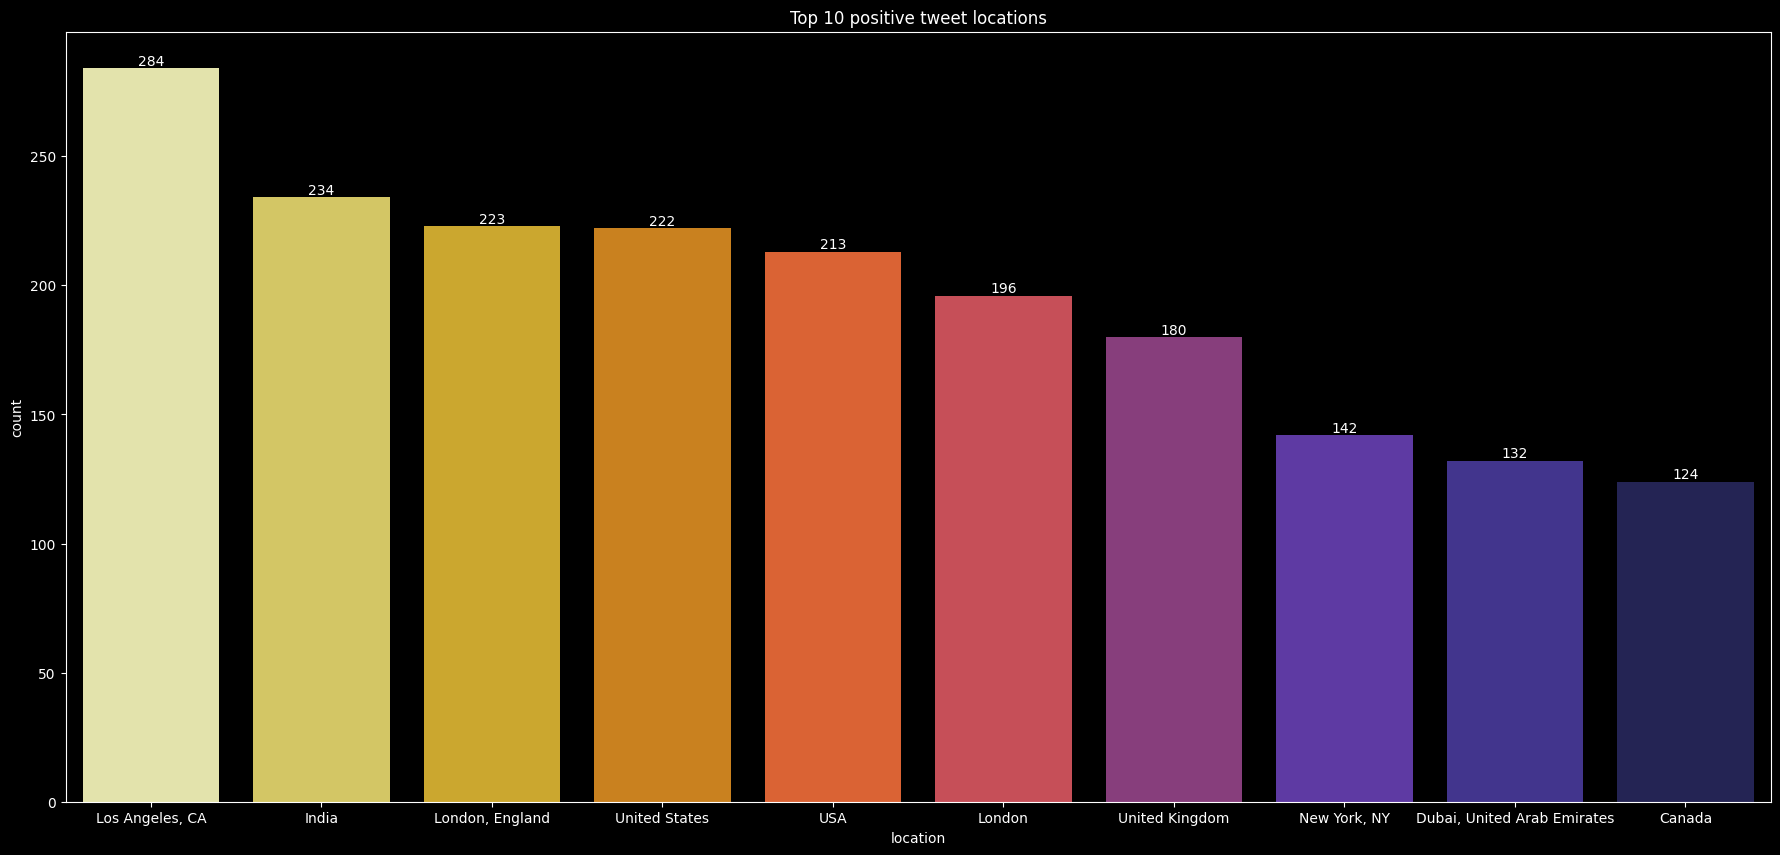

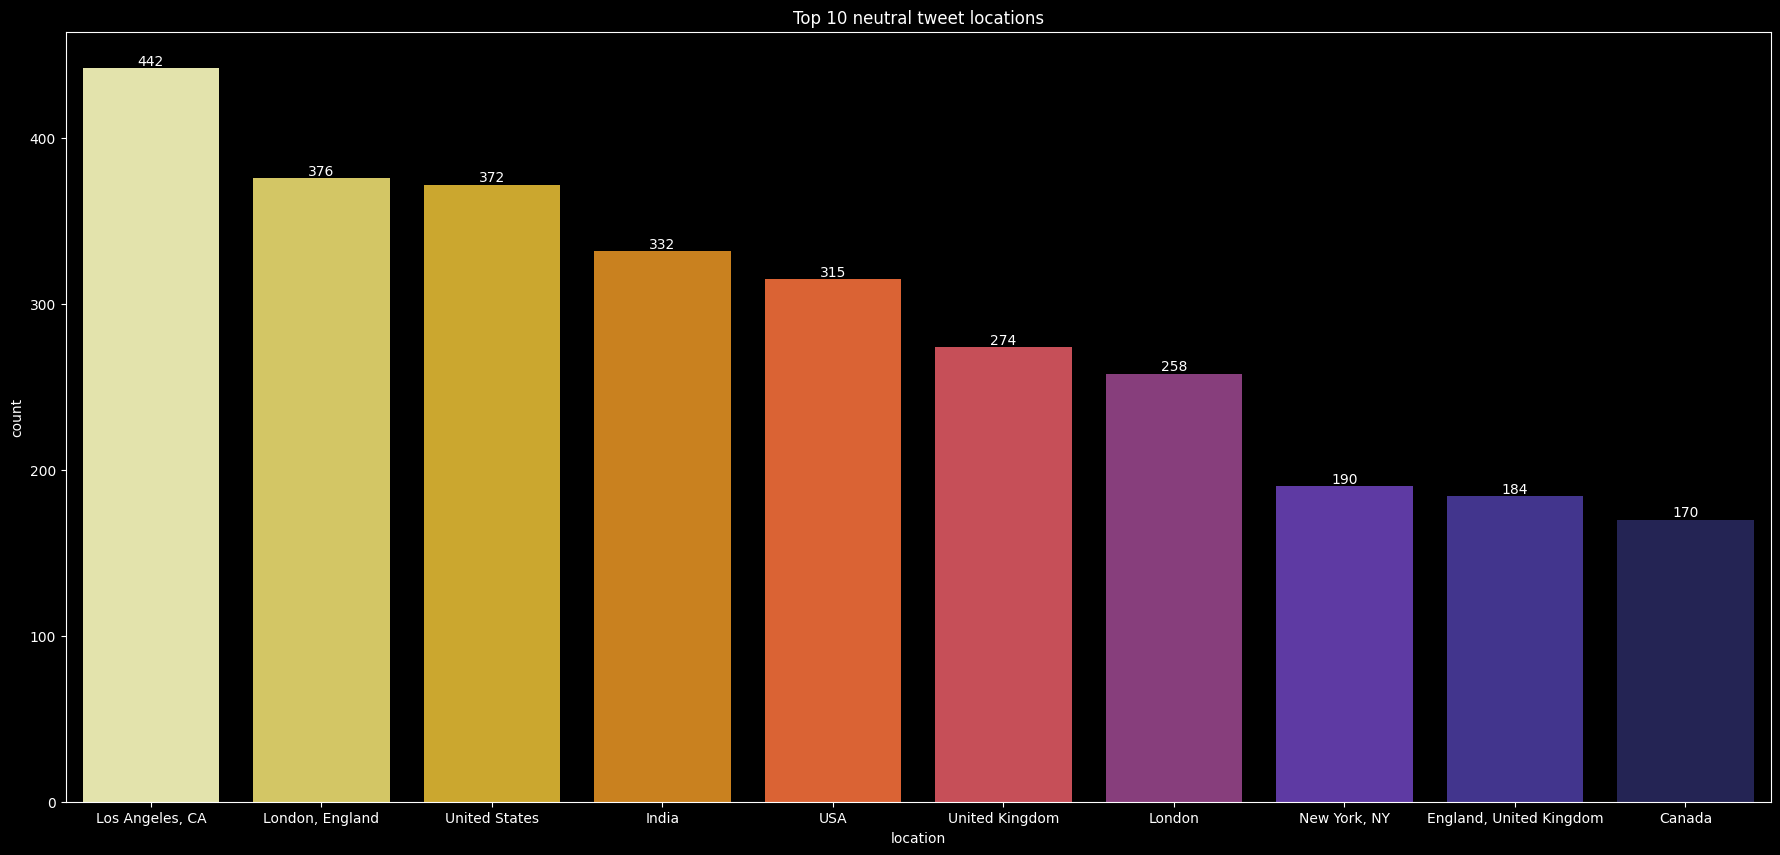

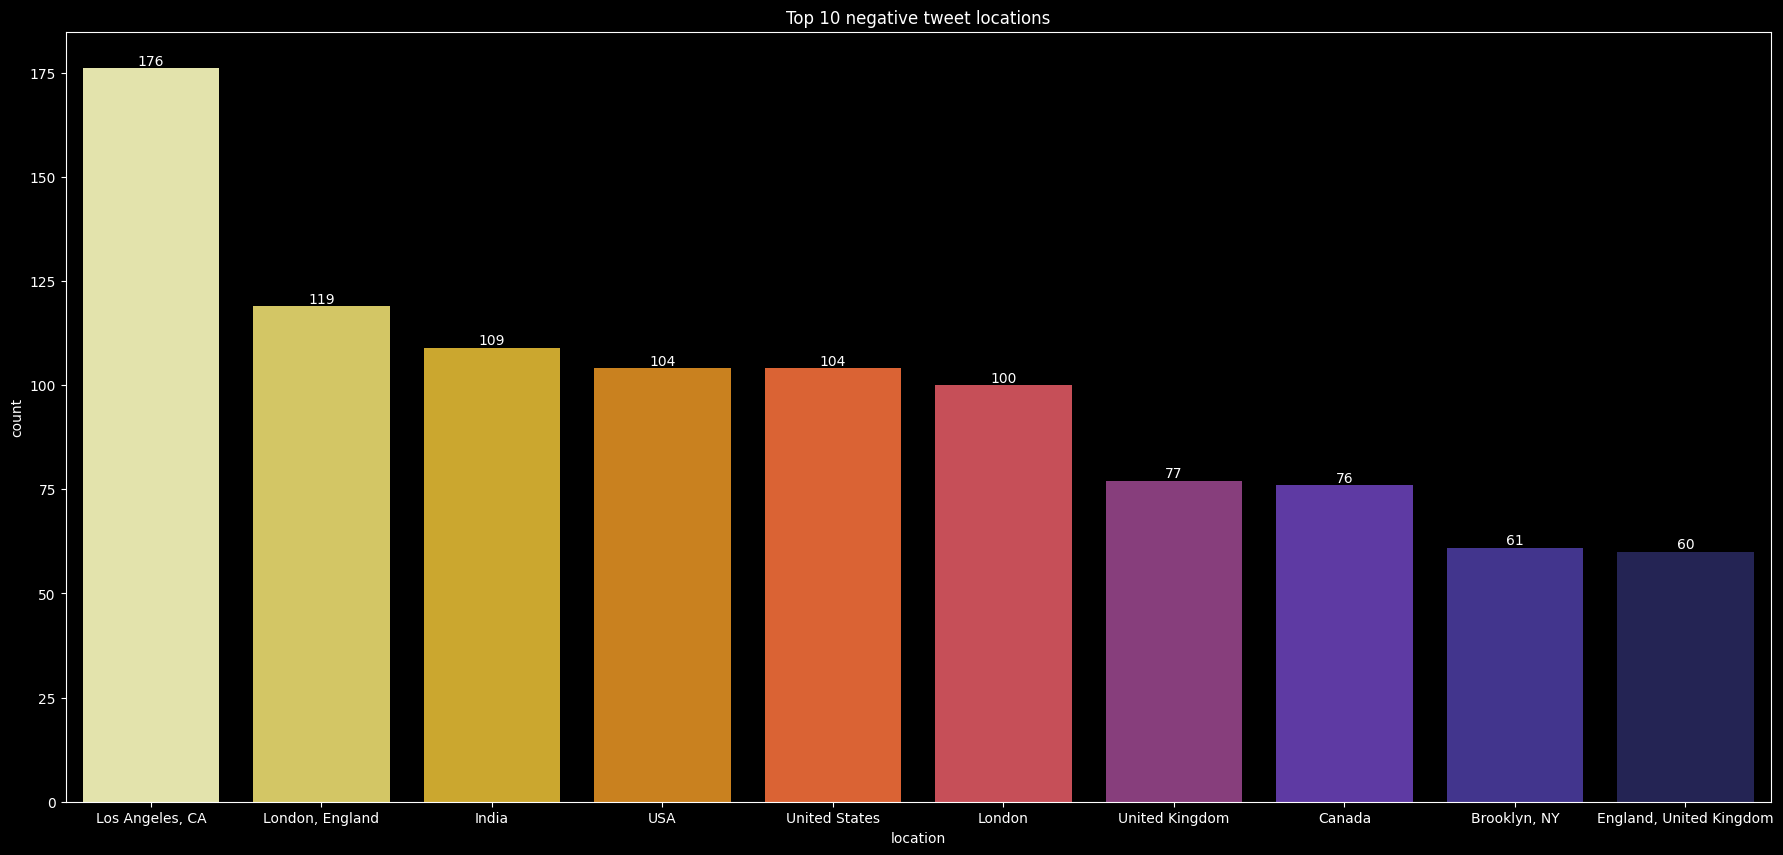

In [118]:
data["user_location"]=data["user_location"].fillna("NaN")
Positive_tweet = data[data["sentiment"]=="Positive"].reset_index()
Neutral_tweet = data[data["sentiment"]=="Neutral"].reset_index()
Negative_tweet = data[data["sentiment"] == "Negative"].reset_index()

Top_10_positive = Positive_tweet["user_location"].value_counts().drop(labels="NaN")[:10].rename_axis("location").reset_index(name="count")
plt.style.use("dark_background")
plt.figure(figsize=(22,10))
a17 = sns.barplot(x="location", y="count", data=Top_10_positive, palette="CMRmap_r")
a17.bar_label(a17.containers[0])
plt.title("Top 10 positive tweet locations")
plt.show()

Top_10_neutral = Neutral_tweet["user_location"].value_counts().drop(labels="NaN")[:10].rename_axis("location").reset_index(name="count")
plt.style.use("dark_background")
plt.figure(figsize=(22,10))
a18 = sns.barplot(x="location", y="count", data=Top_10_neutral, palette="CMRmap_r")
a18.bar_label(a18.containers[0])
plt.title("Top 10 neutral tweet locations")
plt.show()

Top_10_negative = Negative_tweet["user_location"].value_counts().drop(labels="NaN")[:10].rename_axis("location").reset_index(name="count")
plt.style.use("dark_background")
plt.figure(figsize=(22,10))
a19 = sns.barplot(x="location", y="count", data=Top_10_negative, palette="CMRmap_r")
a19.bar_label(a19.containers[0])
plt.title("Top 10 negative tweet locations")
plt.show()


### "ACCOUNTS WITH HIGHEST FOLLOWERS" ANALYSIS BASED ON THE TWEET SENTIMENT

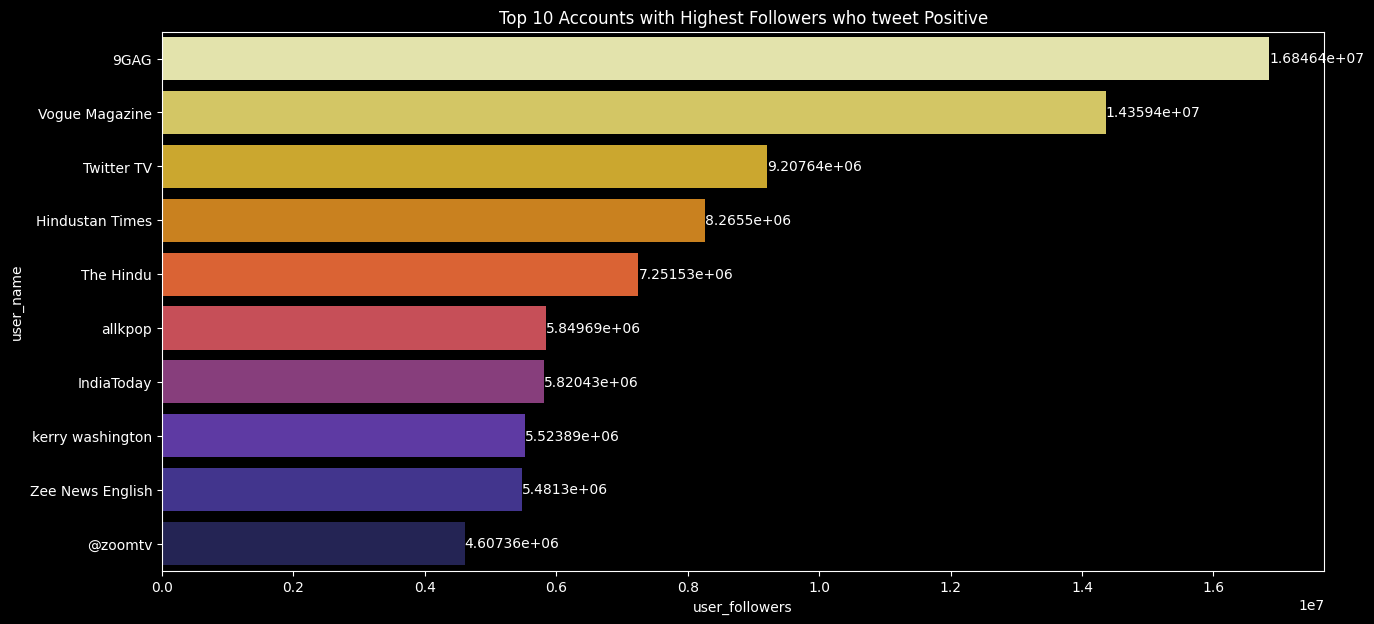

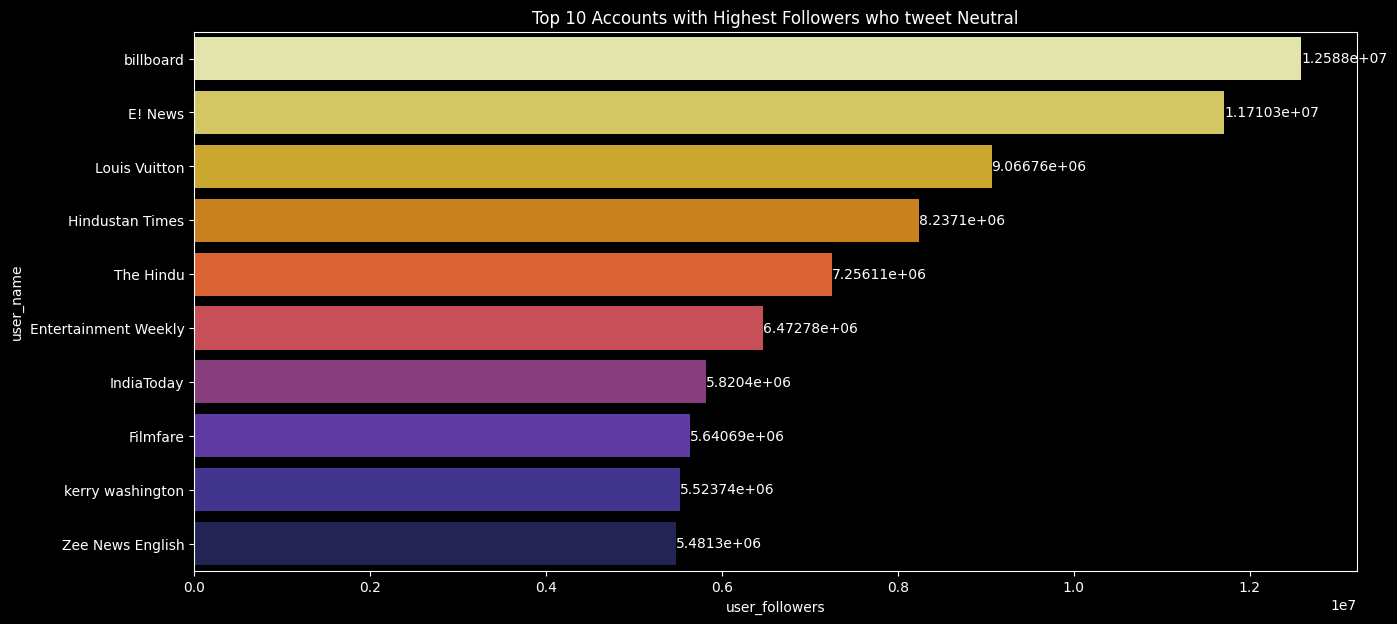

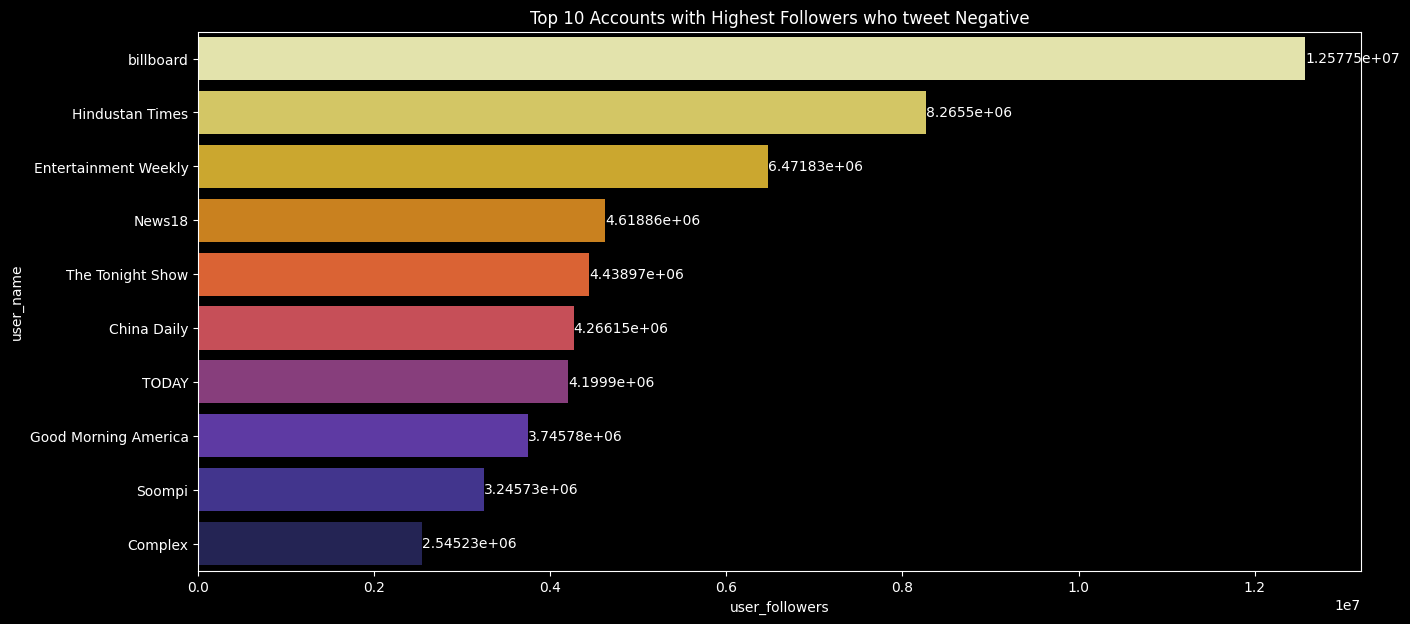

In [120]:
plt.figure(figsize=(15, 7))
a1 = sns.barplot(x = "user_followers", y="user_name", orient="h", palette="CMRmap_r", data = data[data["sentiment"]=="Positive"].drop_duplicates(subset=["user_name"]).sort_values(by="user_followers", ascending=False)[:10])
a1.grid(False)
for container in a1.containers:
    a1.bar_label(container)
plt.title("Top 10 Accounts with Highest Followers who tweet Positive")
plt.show()

plt.figure(figsize=(15, 7))
a1 = sns.barplot(x = "user_followers", y="user_name", orient="h", palette="CMRmap_r", data = data[data["sentiment"]=="Neutral"].drop_duplicates(subset=["user_name"]).sort_values(by="user_followers", ascending=False)[:10])
a1.grid(False)
for container in a1.containers:
    a1.bar_label(container)
plt.title("Top 10 Accounts with Highest Followers who tweet Neutral")
plt.show()

plt.figure(figsize=(15, 7))
a1 = sns.barplot(x = "user_followers", y="user_name", orient="h", palette="CMRmap_r", data = data[data["sentiment"]=="Negative"].drop_duplicates(subset=["user_name"]).sort_values(by="user_followers", ascending=False)[:10])
a1.grid(False)
for container in a1.containers:
    a1.bar_label(container)
plt.title("Top 10 Accounts with Highest Followers who tweet Negative")
plt.show()

### TIME BASED ANALYSIS OF TWEET SENTIMENT

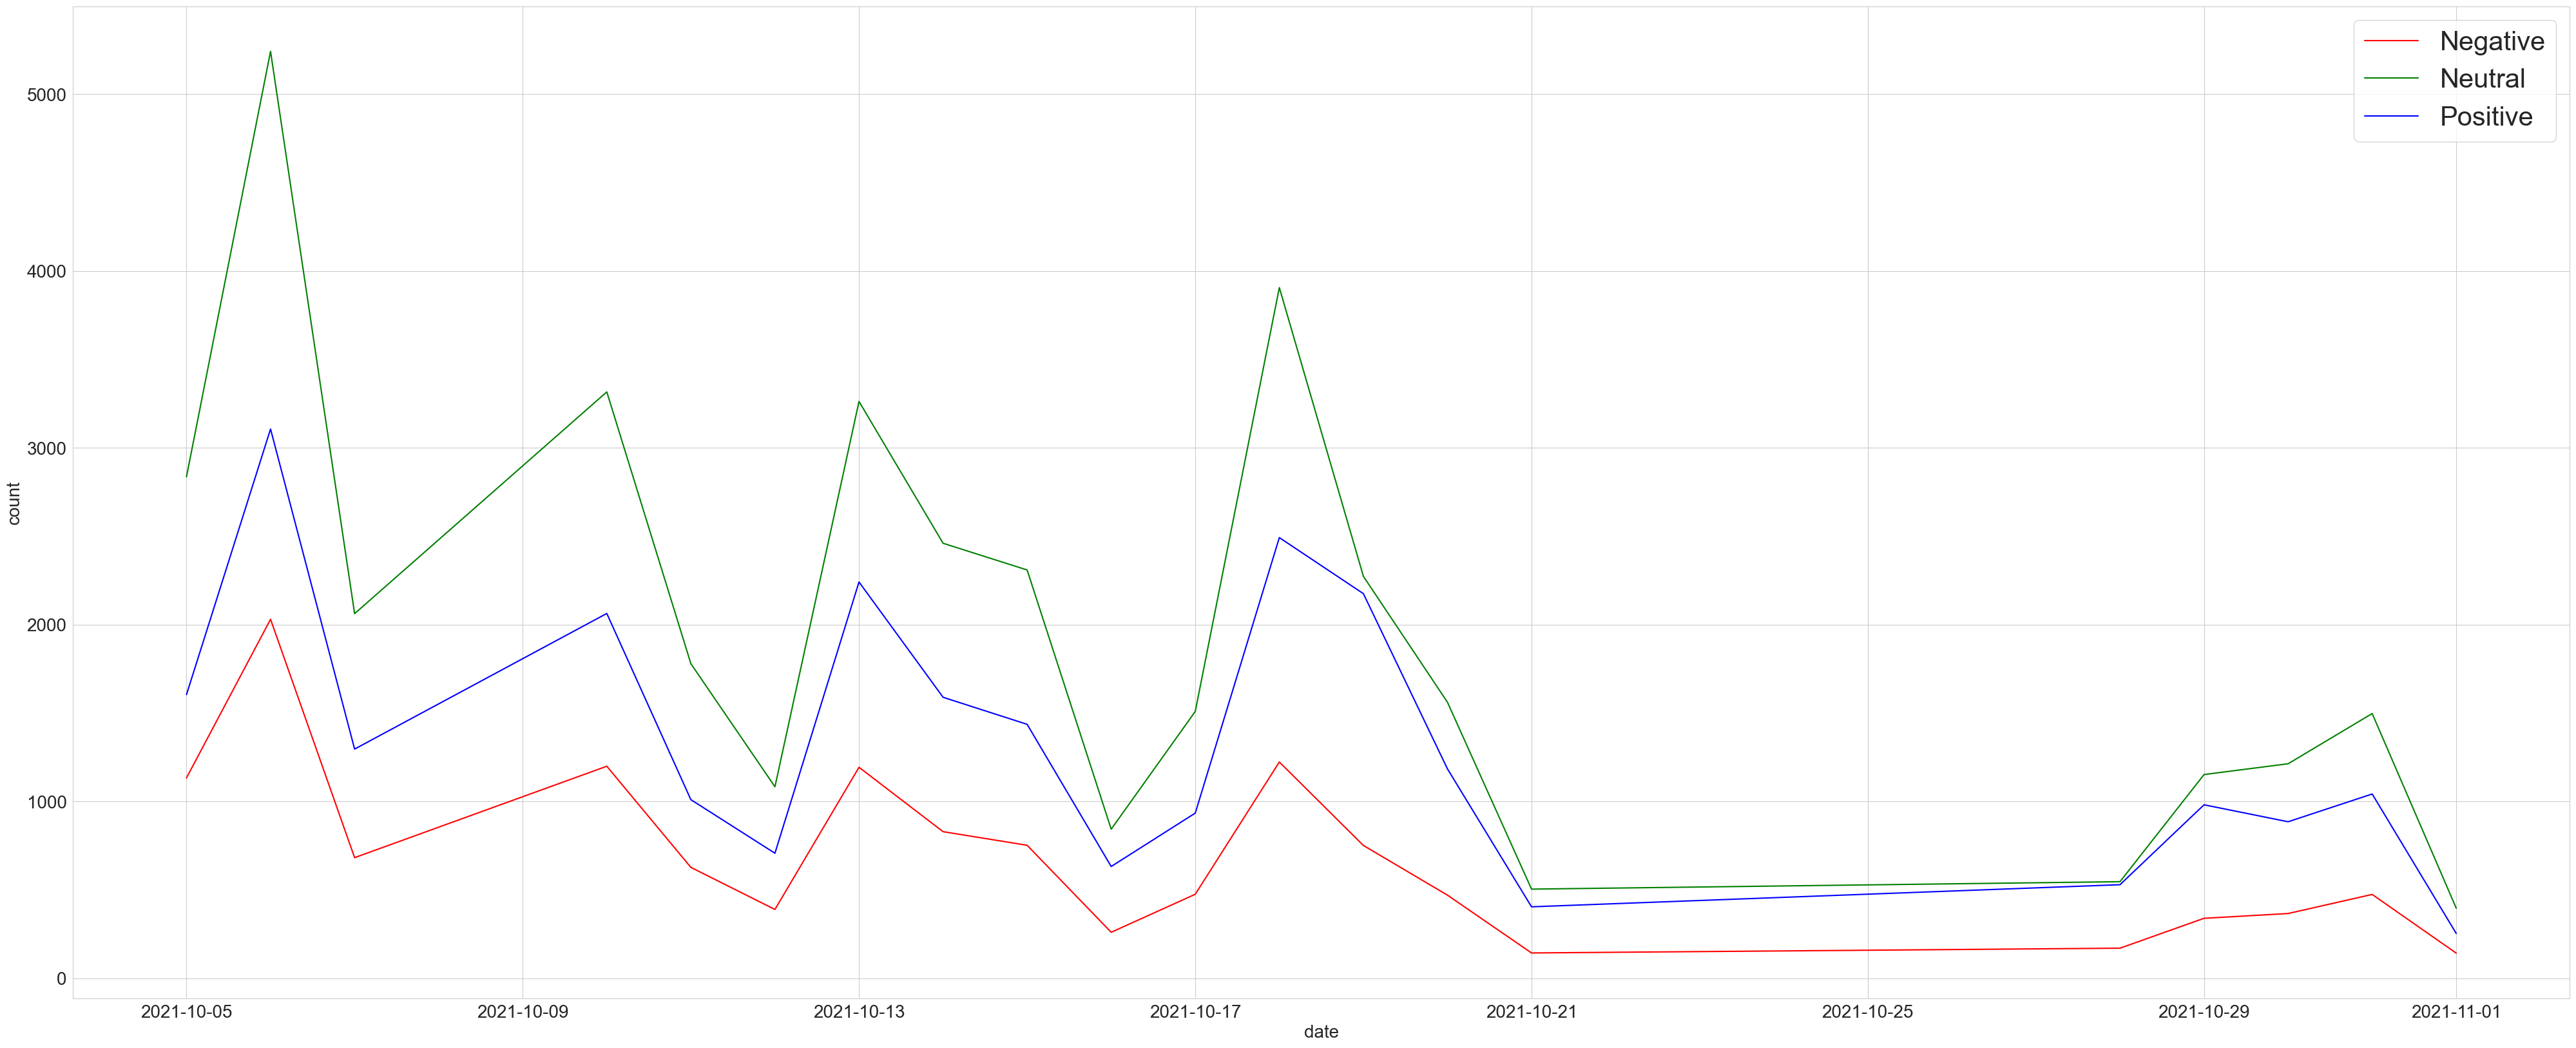

In [135]:
data["date"] = pd.to_datetime(data.date) 
timeline = data.resample('D', on='date')["sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("date", var_name='sentiment',  value_name='vals')
plt.figure(figsize=(50,20))
sns.set_style("whitegrid")
sns.lineplot(x="date", y="vals", hue="sentiment", data=timeline, palette=["r", "g","b"])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel(xlabel="date",fontsize=20)
plt.ylabel(ylabel="count", fontsize=20)
plt.legend(prop={"size":30})
plt.show()